## Run Brownian dynamics in a modified version of the Schutte potential (Schutte et al. JCP 2011)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%load_ext autoreload
%autoreload 2
import h5py
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [3]:
import numpy as np
import itertools
from scipy.stats import norm
import time

In [7]:
import sys
sys.path.append("/Users/daviddesancho/Research/code/smFSmodels/schutte/build/temp.macosx-10.9-x86_64-3.8/")
import schutte

ImportError: dlopen(/Users/daviddesancho/Research/code/smFSmodels/schutte/notebooks/schutte.so, 2): no suitable image found.  Did find:
	/Users/daviddesancho/Research/code/smFSmodels/schutte/notebooks/schutte.so: unknown file type, first eight bytes: 0x7F 0x45 0x4C 0x46 0x02 0x01 0x01 0x00
	/Users/daviddesancho/Research/code/smFSmodels/schutte/notebooks/schutte.so: stat() failed with errno=35

In [3]:
def f(x):
    """
    Functional form of the potential. NOTE
    it is a MODIFIED version to have deeper
    minima in the intermediate region.

    x : float
        Value of coordinate x.

    """
    if x <= 0.0:
        return (1.-x*x)*(1.-x*x)
    elif x >= 8.0:
        return (1.-(x-8.)*(x-8.))*(1.-(x-8.)*(x-8.))
    else:
        return 2.7/5. + 2.3/5. * np.cos(x*np.pi)

In [4]:
x = np.linspace(-1.9,9.9,num=1000)
type(x),max(x),min(x),len(x)

(numpy.ndarray, 9.9, -1.9, 1000)

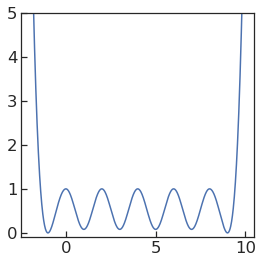

In [5]:
fig, ax = plt.subplots(figsize=(4,4))
fplot = [f(y) for y in x]
#dx = [cossio.dGqxdx(0, y, barrier=5.) for y in x]
ax.plot(x, fplot)
ax.set_ylim(-0.1,5)
#ax[0].set_ylabel('$G(x)$', fontsize=20)
#ax[1].plot(x, dGqxdx)
#ax[1].set_xlabel('$x$', fontsize=20)
#ax[1].set_ylabel('$\partial G(x)/\partial x$', fontsize=20)
#ax[1].hlines(0, -10, 10, linestyle='dashed', linewidth=0.5)

plt.tight_layout(h_pad=0)

In [66]:
def schutte_runner(inp):
    np.random.seed()
    numsteps = inp[0]
    x = inp[1]
    dt = inp[2]

    tt, xk = schutte.run_brownian(x0=x, dt=dt, \
                    numsteps=numsteps, fwrite=int(1./dt))
    data = np.column_stack((tt,xk))

    h5file = "data/schutte_x0%g_num%g_dt%g.h5"%(x,numsteps,dt)
    with h5py.File(h5file, "w") as hf:
        hf.create_dataset("data", data=data)

    return h5file, tt, xk

In [80]:
h5file, t, x = schutte_runner([1e7, 5., 5e-4])

In [84]:
h5file = "data/schutte_x05_num1e+07_dt0.0005.h5"
file = h5py.File(h5file, 'r')
data = np.array(file['data'])
file.close()

In [82]:
len(t),len(x)

(5001, 5001)

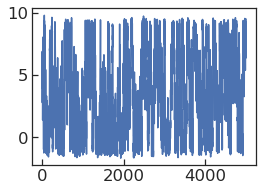

In [94]:
fig, ax = plt.subplots(2,figsize=(4,3))
#fplot = [f(y) for y in x]
#ax.plot(x, fplot)
ax[0].plot(t,x)
ax[1].plot(t,x)
ax[1].set_xlim(0,15)
#ax.set_ylim(-0.1,5)

plt.tight_layout(h_pad=0)

In [85]:
lev = np.linspace(-1.9,9.9,num=1000)
fplot = [f(y) for y in lev]

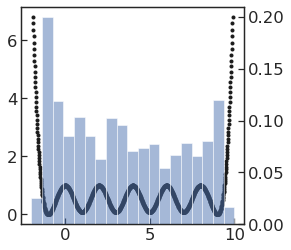

In [86]:
fig, ax = plt.subplots(figsize=(4,4))
axt = ax.twinx()
axt.hist(x, bins=np.linspace(-2,10,20), density=True, alpha=0.5)
#axt.hist(data[hdb.labels_==0, 0], bins=np.linspace(-10,10,30), density=True, alpha=0.5)
#axt.hist(data[hdb.labels_==-1, 0], bins=np.linspace(-10,10,30), density=True, alpha=0.5)
ax.plot(lev,fplot, '.', color='k')

In [87]:
#RUN LONG to obtain EQUILIBRIUM DISTRIBUTION and compare with previous
h5file2, t2, x2 = schutte_runner([1e8, 5., 5e-4])
# too small dt: h5file3, t3, x3 = schutte_runner([1e10, 5., 1e-4])

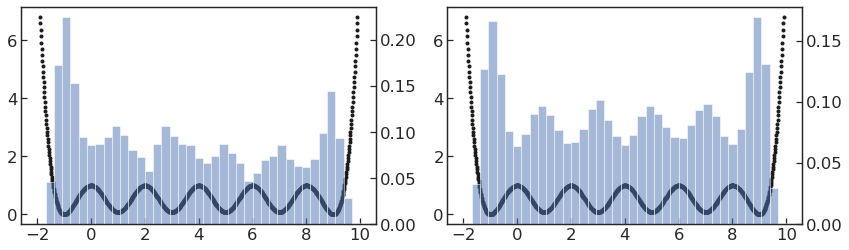

In [89]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
axt = ax[0].twinx()
axt.hist(x, bins=np.linspace(-2,10,40), density=True, alpha=0.5)
ax[0].plot(lev,fplot, '.', color='k')
ax[0].set_title('numsteps=1e7')
axt = ax[1].twinx()
axt.hist(x2, bins=np.linspace(-2,10,40), density=True, alpha=0.5)
ax[1].plot(lev,fplot, '.', color='k')
ax[0].set_title('numsteps=1e8')

### STOP HERE !!!